# What are class based views?
In short, class based views are simply django views written as python classes. At the end of the day all views are just functions but by using classes we are able to extend our code by utilizing the following:

- Inheritance so we can write reusable code and make our application more DRY. (Don’t Repeat Yourself)
- Built in methods and views to eliminate redundancy for common use cases
- separate our code by http method types such as GET and POST.

Django didn’t always have class based views
There was a point where django only had function based views. There were methods added to take care of common actions but extending functions can be very limiting so to fix this problem django added class based views.

Let’s take a look at a view that accomplishes the same tasks written as a function and then a class.

**Example: Function based view**

In [ ]:
# views.py

from django.shortcuts import render
from .models import Product

def productList(request):
	products = Product.objects.all()
	context = {'products/':products}
	return render(request, 'base/product_list.html', context)

In [ ]:
# urls.py

from . import views 

urlpatterns = [
    path('products', views.productsList, name='products'),
]

Now as a class based view…

**Ex: Class based view**

In [ ]:
# views.py

from django.views.generic.list import ListView
from .models import Product 

class ProductList(ListView):
	model = Product

In [ ]:
# urls.py

from . import views 

urlpatterns = [
    path('products', views.ProductList.as_view(), name='products'),
]

# The `as_view()` method
Because we are using a class based view, we need to add the “as_view” method for our url resolver. This is because the django url resolver cannot process a class but instead needs a function. To resolve this, we trigger the “as view” method from our “View” class which we inherited from and the “as view” method will call the correct view function depending on the method sent, therefore giving the url resolver a function.

As you can see in this example the class based view is much simpler to write and takes care of the magic under the hood, which we cannot see at the moment. This is a very simplistic example but it already demonstrates some powers of the class based view.

In this case we inherited from a built in view called ListView which at a minimum just needed a model name or a queryset. The view already knows which template to render, and how to pass in the data into the template. With a function based view we have to take care of each step by first querying the database, passing in our context data and then rendering our template.




# Understand exactly how they work before using them.

This is actually where my issue with class based views for beginners comes in. There is a lot of power in using class based views but you should try to understand exactly how they work before using them. In most cases you will need a lot more customization then what we see here and that’s where function based views thrive in the beginning. They are explicit and easy to understand, no magic underneath the hood.




# Separating code by http methods

In this next example I want to demonstrate how class based views take care of http methods by passing in a post request onto the same view.

**Ex: Function based view**

In [ ]:
from django.shortcuts import render
from .models import Product

def productsList(request):
	products = Product.objects.all()
	
	if request.method == 'POST':
  		Product.object.create()
	
	context = {'products':products}
	return render(request, 'base/product_list.html', context)

**Ex: Class based view**

In [ ]:
from django.views.generic.list import ListView
from .models import Product 

class ProductList(ListView):
	model = Product

	def post(self, request):
		Product.object.create()

If you take a look at the two methods you can see that the function based view takes in every http method type, this means if we are sending “post” data then we have to check the request type ourselves to process it correctly.

With class based views we have a function for different methods. So if we send a GET request, then the “get” function gets triggered and any logic we have in there gets processed. If we send a “post” request then that request is sent to the “post” function for processing. This makes for much cleaner code by separating our request.





# Class based views make our code clean and reusable
So to summarize what class based views are, they are a way to write cleaner and reusable code using python classes. We’ll get into a few more examples and also cover some of the class based views django already has built in for us but first let’s answer a few more questions.






# Do class based views replace function based views?
No, class based views are simply another way of writing views, they are not meant to be a replacement. You can use them together in the same application as you see fit. In fact there are some cases where you may have most of your application written using classes but where a function based view may make more sense for a particular task.




# Should I be using class based views instead of function based views?
In short the answer is that it’s 100% up to you. If you want to write the most efficient and clean code then in theory class based views is what you should be using. The only problem with that statement is that not everyone is at the same level so you can actually slow down your progress by trying to force class based views into your application, therefore writing less efficient code.

Let me give you a brief example. In 2018 I launched an application for a company I was working at and already had an active user base. At that point (about 6 months into the launch) I was using only function based views. After doing some research I decided that I wanted to step up my game and change all my views to class based views. BIG ROOKIE MISTAKE! I Spent some time studying class based views and started updating my code base. The simple views were easy to update but the ones that had more custom logic were a pain and I ended up adding more bugs to my application.

It wasn’t long before I aborted the mission and switched back to function based views after a month of unnecessary struggles. Eventually I updated some of the views to class based views but now it was a slow implementation and I only updated the views where it made sense.

Moral of the story. Don’t use class based views just because you think they are better, and make sure you know how they work before using them. For me it was about a year before I felt comfortable enough to use them consistently in my application.

# The “View” Class

While django provides us with a number of built in class based views to work with, at the core of all these views in one main view called “View”. This is a class that all other views will inherit from and provides us with the core functionality to make a django class based view.

Here we will create a simple view that queries all the products from our database and renders a template.

In [ ]:
# views.py

from django.views.generic import View
from .models import Product 

class ProductList(View):

    def get(self, request, *args, **kwargs): 
        products = Product.objects.all()
        context  = {'products':products}
        return render(request, 'base/product_list.html', context)

    def post(self, request, *args, **kwargs): 
        pass

In [ ]:
# urls.py

from .views import ProductList

urlpatterns = [
    path('products', ProductList.as_view(), name='products'),
]

# Keeping things DRY

Now in this case all we need is a simple view that returns back a template with a queryset of data. Thankfully django already knows that this is a common task so we don’t have to write all the logic ourselves. This is a perfect example of where we may want to use the built in “ListView” turning the view from what we currently have into this:

In [ ]:
from django.views.generic.list import ListView
from .models import Product 

class ProductList(ListView):
	model = Product

# CRUD Application Example
Let’s see what a collection of views would look like for a simple application with CRUD functionality.

What I want to do here is give you an example of what a simple to-do application would look like if we utilized the full power of class based views. We will create views to perform the following actions:

1. List out our to do items
2. View a single item
3. Create a new item
4. Update an existing item
5. Delete an item

Here’s what each view should look like in our application.

In [ ]:
# views.py

from django.views.generic.list import ListView
from django.views.generic.detail import DetailView
from django.views.generic.edit import CreateView, UpdateView, DeleteView
from django.urls import reverse_lazy
from .models import Task

class TaskList(ListView):
	model = Task

class TaskDetail(DetailView):
	model = Task

class TaskCreate(CreateView):
	model = Task
	fields = ['title', 'description', 'complete']
	success_url = reverse_lazy('tasks')

class TaskUpdate(UpdateView):
	model = Task
	fields = ['title', 'description', 'complete']
	success_url = reverse_lazy('tasks')

class TaskDelete(DeleteView):
	model = Task
	context_object_name = 'task'
	success_url = reverse_lazy('tasks')

In [ ]:
# urls.py

from .views import TaskList, TaskDetail, TaskCreate, TaskUpdate, TaskDelete


urlpatterns = [
    path('', TaskList.as_view(), name='tasks'),
    path('task/<str:pk>/', TaskDetail.as_view(), name='task'),
    path('task-create/', TaskCreate.as_view(), name='task-create'),
    path('task-update/<str:pk>/', TaskUpdate.as_view(), name='task-update'),
    path('task-delete/<str:pk>/', TaskDelete.as_view(), name='task-delete'),
]

The following built in views have been created by the django team to make these types of operations easier for us. Let’s take a look under the hood and see how a view is created and what other attributes and methods it may have.

# How these views are constructed

To understand how django class based views work we need to understand how they are constructed. Django class based views are typically a collection of other views and mixins. Let’s take a look at the 5 built in views from our sample application and see how they are made along with how we can customize certain default settings.

`Mixins are simply classes that contain methods to be used by other classes. We use mixins when we want to when we want to add a particular feature that will be made available in multiple child objects. They should be use to take care of one specific task and should not be extended. When using mixins, order of inheritance matters.`

### ListView

In [ ]:
class ListView(MultipleObjectTemplateResponseMixin, BaseListView):
     """
     Render some list of objects, set by `self.model` or `self.queryset`.
     """

The ListView inherits directly from 1 view and 1 mixin, but all together there are a total of 2 views and 4 mixins that give this view all the attributes and methods that it has.

1. MultipleObjectTemplateResponseMixin
2. TemplateResponseMixin
3. BaseListView
4. MultipleObjectMixin
5. ContextMixin
6. View

Each parent view and mixin adds or enhances a set of attributes and methods for our built in view.
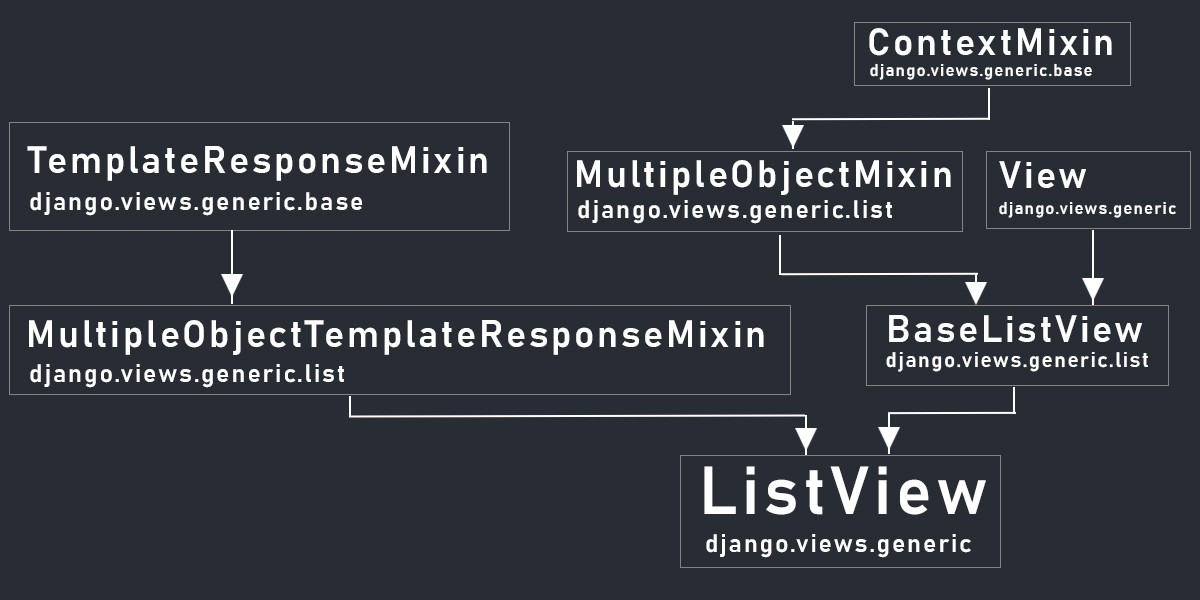

In [ ]:
from django.views.generic.list import ListView

class TaskList(ListView):
	model = Task
	template_name = 'base/tasks.html'
	context_object_name = 'tasks'
	paginate_by = 5
	ordering = ['-date_created']

`template_name`: By default the `ListView` Looks for a template with the prefix of the model name (task) and the suffix of _list.html if not otherwise set (`task_list.html`). This can be overridden by setting the “template_name” attribute.

`context_object_name`: Override the default queryset name of “object_list” by setting the “context_object_name” attribute. It helps to have a more user friendly name to work with besides just “object_list”.

`paginate_by` & `ordering`: The list view also has pagination and ordering already built in. We can set these methods by setting their attributes like I did in the code example above.

See all attributes and methods in these helpful resources:

- <a href="https://ccbv.co.uk/projects/Django/3.1/django.views.generic.list/ListView/">Attributes, Methods and Ancestors (MRO)</a>
- <a href="https://github.com/django/django/blob/main/django/views/generic/list.py">Source Code</a>
- <a href="https://docs.djangoproject.com/en/4.1/ref/class-based-views/generic-display/#listview">Official Documentation</a>

### DetailView

In [ ]:
class DetailView(SingleObjectTemplateResponseMixin, BaseDetailView):
    """
    Render a "detail" view of an object.
    """

The DetailView inherits directly from 1 view and 1 mixin, but all together there are a total of 2 views and 4 mixins that give this view all the attributes and methods that it has.

1. SingleObjectTemplateResponseMixin
2. TemplateResponseMixin
3. BaseDetailView
4. SingleObjectMixin
5. ContextMixin
6. View

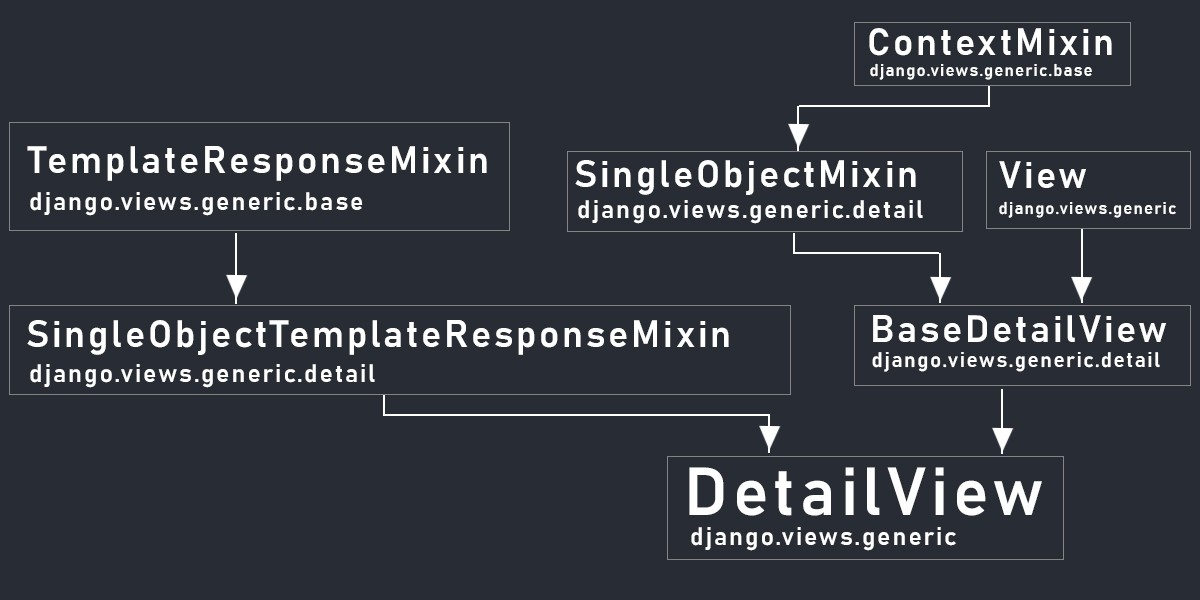

In [ ]:
# Overriding Default values

from django.views.generic.detail import DetailView

class TaskDetail(DetailView):
	model = Task
	template_name = 'base/task.html'
	context_object_name = 'task'
	pk_url_kwarg = 'custom_pk'

`template_name` = By default the DetailView looks for a template with the prefix of the model name (task) and the suffix of _detail.html if not otherwise set (`task_detail.html`).

`context_object_name`: Override the default model name of “object” by setting the “context_object_name” attribute.

`pk_url_kwarg`: By default the view looks for a primary key in the url called “pk” or a slug field called “slug”. Both of these values can be customized with slug_field or “pk_url_kwarg”

See all attributes and methods in these helpful resources:

- <a href="https://ccbv.co.uk/projects/Django/3.1/django.views.generic.detail/DetailView/">Attributes, Methods and Ancestors (MRO)</a>
- <a href="https://github.com/django/django/blob/main/django/views/generic/detail.py">Source Code</a>
- <a href="https://docs.djangoproject.com/en/4.1/ref/class-based-views/generic-display/#detailview">Official Documentation</a>

### CreateView

In [ ]:
class CreateView(SingleObjectTemplateResponseMixin, BaseCreateView):
    """
    View for creating a new object, with a response rendered by a template.
    """

The CreateView inherits directly from 1 view and 1 mixin, but all together there are a total of 3 views and 6 mixins that give this view all the attributes and methods that it has.

1. SingleObjectTemplateResponseMixin
2. TemplateResponseMixin
3. BaseCreateView
4. ModelFormMixin
5. FormMixin
6. SingleObjectMixin
7. ContextMixin
8. ProcessFormView
9. View

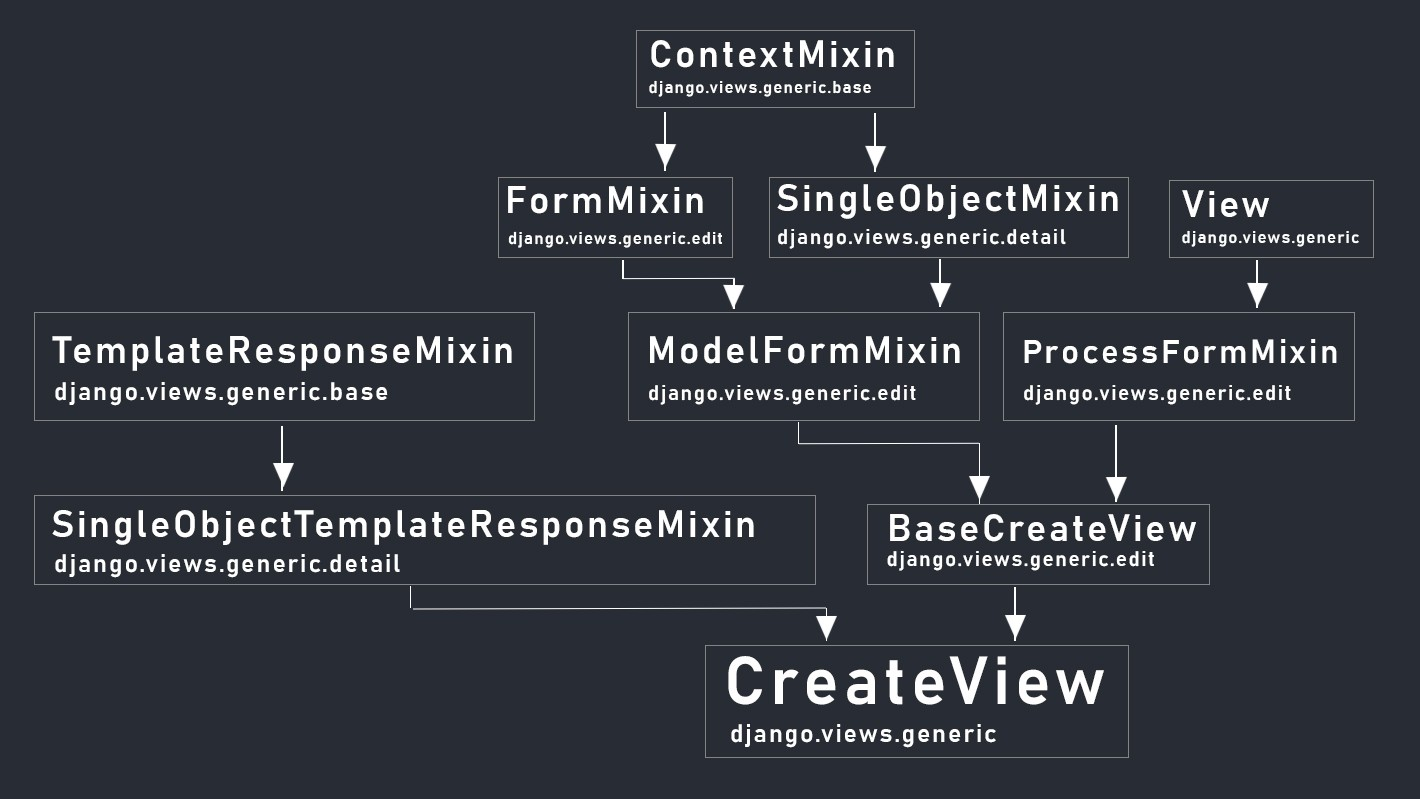

In [ ]:
# Overriding Default values

from django.views.generic.edit import CreateView

class TaskCreate(CreateView):
	model = Task
	success_url = reverse_lazy('tasks')
	template_name = 'base/form.html'
	form_class = TaskForm

`template_name`: By default CreateView looks for a template with the prefix of the model name (task) and the suffix of _form.html if not otherwise set (`task_form.html`). This can be overridden by setting the “template_name” attribute.

`form_class`: By default this view creates a model form for us based on the model we specify. As you can see in the example if we don’t specify a model form to use, one will be created by fail for us after we specify the field names. We can use our own model form by creating a mode for and setting the “form_class attribute”.

See all attributes and methods in these helpful resources:

- <a href="https://ccbv.co.uk/projects/Django/3.1/django.views.generic.edit/CreateView/">Attributes, Methods and Ancestors (MRO)</a>
- <a href="https://github.com/django/django/blob/main/django/views/generic/edit.py">Source Code</a>
- <a href="https://docs.djangoproject.com/en/4.1/ref/class-based-views/generic-editing/#createview">Official Documentation</a>

### UpdateView

In [ ]:
class UpdateView(SingleObjectTemplateResponseMixin, BaseUpdateView):
    """View for updating an object, with a response rendered by a template."""
    template_name_suffix = '_form'

This view by default follows the same template_naming convention and form principles as the create view. Both views will look for the same form and template unless otherwise specified.

1. SingleObjectTemplateResponseMixin
2. TemplateResponseMixin
3. BaseUpdateView
4. ModelFormMixin
5. FormMixin
6. SingleObjectMixin
7. ContextMixin
8. ProcessFormView
9. View

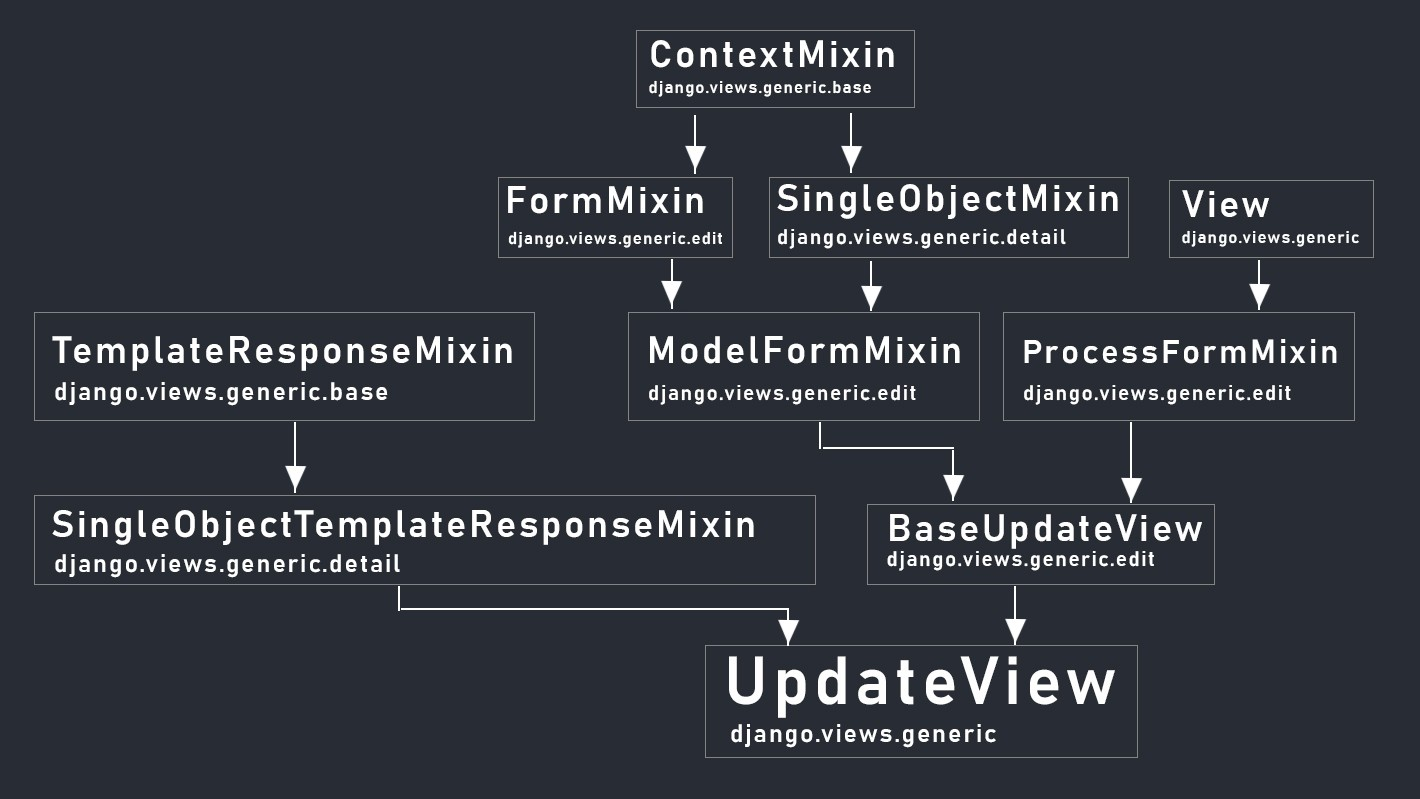

See all attributes and methods in these helpful resources:

- <a href="https://ccbv.co.uk/projects/Django/3.1/django.views.generic.edit/UpdateView/">Attributes, Methods and Ancestors (MRO)</a>
- <a href="https://github.com/django/django/blob/main/django/views/generic/edit.py">Source Code</a>
- <a href="https://docs.djangoproject.com/en/4.1/ref/class-based-views/generic-editing/#django.views.generic.edit.UpdateView">Official Documentation</a>

### DeleteView

In [ ]:
class DeleteView(SingleObjectTemplateResponseMixin, BaseDeleteView):
    """
    View for deleting an object retrieved with self.get_object(), with a
    response rendered by a template.
    """

The DeleteView inherits directly from 1 view and 1 mixin, but all together there are a total of 3 views and 5 mixins that give this view all the attributes and methods that it has.

1. SingleObjectTemplateResponseMixin
2. TemplateResponseMixin
3. BaseDeleteView
4. DeletionMixin
5. BaseDetailView
6. SingleObjectMixin
7. ContextMixin
8. View

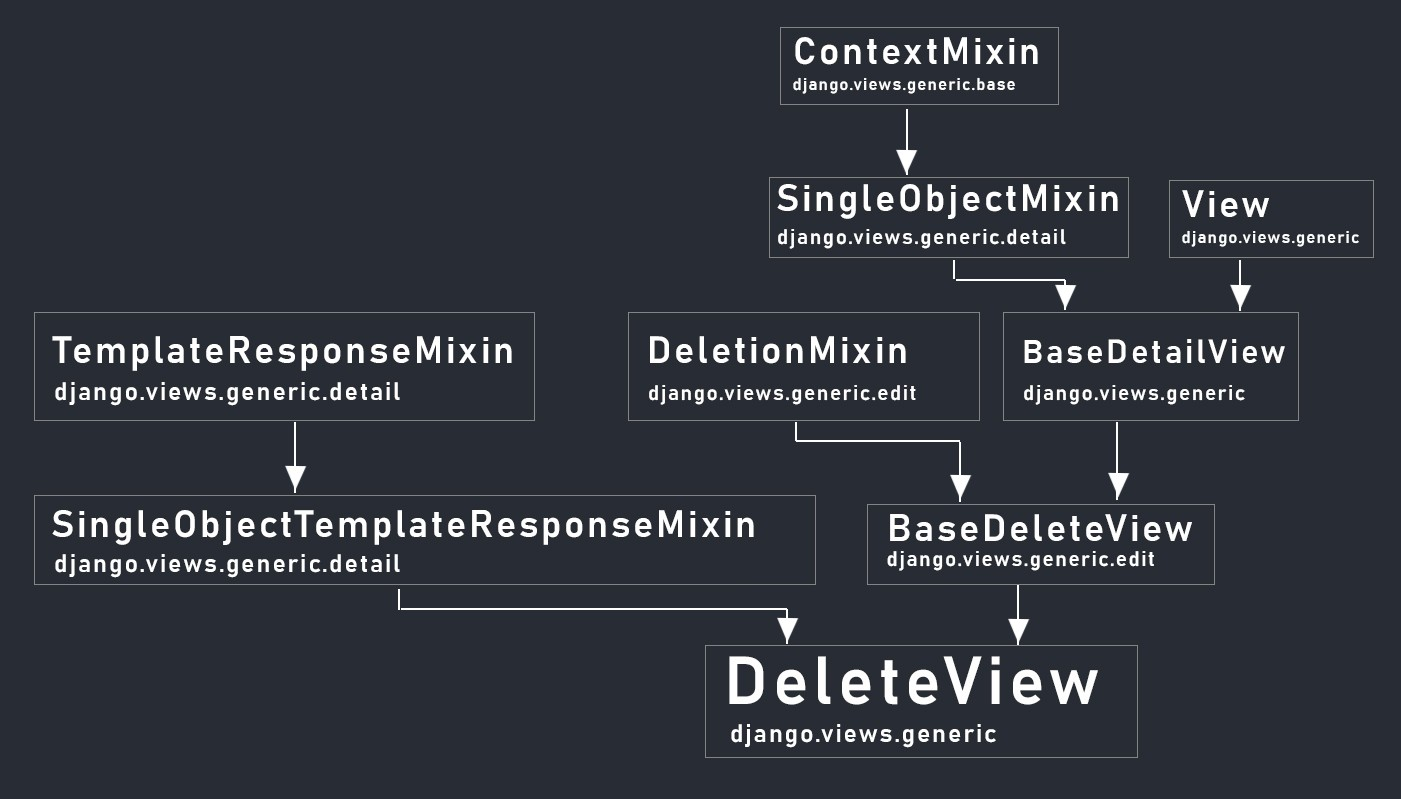

In [ ]:
# Overriding Default values

from django.views.generic.edit import CreateView, UpdateView, DeleteView

class TaskDelete(DeleteView):
    model = Task
    template_name = 'base/delete.html'
    context_object_name = 'task'
    pk_url_kwarg = 'custom_pk'

`template_name`: By default DeleteView look’s for a template with the prefix of the model name (task) and the suffix of _confirm_delete.html if not otherwise set (`task_confirm_delete.html`). This can be overridden by setting the “template_name” attribute.

`pk_url_kwarg`: By default the view looks for a primary key in the url called “pk” or a slug field called “slug”. Both of these values can be customized with slug_field or “pk_url_kwarg”

View more attributes and methods in these helpful resources:

- <a href="https://ccbv.co.uk/projects/Django/3.1/django.views.generic.edit/DeleteView/">Attributes, Methods and Ancestors (MRO)</a>
- <a href="https://github.com/django/django/blob/main/django/views/generic/edit.py">Source Code</a>
- <a href="https://docs.djangoproject.com/en/4.1/ref/class-based-views/generic-editing/#deleteview">Official Documentation</a>

# Django Built in views

Django provides use with many built in views we can use and customize. These views are separated into the following categories:

- Generic Base Views
- Generic Display Views
- Generic Editing Views
- Generic date views
- Auth Views

Listed out below are all the django built in views inside of their category:

### Auth Views

- LoginView
- LogoutView
- PasswordChangeDoneView
- PasswordChangeView
- PasswordResetCompleteView
- PasswordResetConfirmView
- PasswordResetDoneView
- PasswordResetView

### Generic Base

- RedirectView
- TemplateView
- View

### Generic List

- ListView

### Generic Detail

- DetailView

### Generic Edit

- CreateView
- DeleteView
- FormView
- UpdateView

### Generic Dates

- ArchiveIndexView
- DateDetailView
- DayArchiveView
- MonthArchiveView
- TodayArchiveView
- WeekArchiveView
- YearArchiveView